# EDA df1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import pandas as pd
import unicodedata
import re
pd.set_option('display.max.column',None)

In [2]:
df_1 = pd.read_csv(r'C:\Users\denis\Desktop\Curso\EDA\EDA_Anime\anime.csv', encoding='latin1', sep=",", quotechar='"', engine='python')

In [3]:
df_1

anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                          GintamaÂ°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatural  Movie        1   
1      Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64   
2      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
3                                       Sci-Fi, Thriller     TV       24   
4      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
...                                                  ...    ...      ...   
12289                                             Hentai    OVA        1   
12290                                             Hentai    OVA        1   
12291                                             Hentai    OVA        4   
12292                                             Hentai    OVA        1   
12293                                             Hentai  Movie        1   

       rating  members  
0        9.37   200630  
1        9.26   793665  
2        9.25   114262  
3        9.17   673572  
4        9.16   151266  
...       ...      ...  
12289    4.15      211  
12290    4.28      183  
12291    4.88      219  
12292    4.98      175  
12293    5.46      142  

[12294 rows x 7 columns]

**Clasificacion de variables y revisión de valores falta**


In [4]:
df_1.info

<bound method DataFrame.info of        anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                          GintamaÂ°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Superna

In [5]:
df_1.shape

(12294, 7)

In [6]:
df_1.dtypes

anime_id      int64
name         object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

- Espacio en memoria utilizado.

In [7]:
df_1.memory_usage(deep=True).sum()

np.int64(3774518)

- comprobamos si haya jerarquías o estructuras anidadas.

- comprobaremos las columnas tipo object, menos el nombre, ya que el nombre si puede contener comas barras u otros signos.

In [8]:
# Verificar si alguna celda de 'genre' tiene géneros separados por comas
df_1['genre'].apply(lambda x: isinstance(x, str) and ',' in x).sum()

np.int64(9428)

In [9]:
# Verificar si alguna celda de 'genre' tiene géneros separados por comas
df_1['type'].apply(lambda x: isinstance(x, str) and ',' in x).sum()

np.int64(0)

In [10]:
# Verificar si alguna celda de 'genre' tiene géneros separados por comas
df_1['episodes'].apply(lambda x: isinstance(x, str) and ',' in x).sum()

np.int64(0)

- Efectivamente, la columna 'genre'  presentan jerarquías o estructuras anidadas. Será necesario realizar un análisis más detallado determinar si es conveniente separarla o mantener los valores tal como están.

In [11]:
df_1.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [12]:
df_1[df_1.isnull().any(axis=1)]

anime_id                                               name  \
2844      33242          IS: Infinite Stratos 2 - Infinite Wedding   
3541      33589                                      ViVid Strike!   
6040      29765                                  Metropolis (2009)   
6646      32695                                       Match Shoujo   
7018      33187                                   Katsudou Shashin   
...         ...                                                ...   
12274     34492  Nuki Doki! Tenshi to Akuma no Sakusei Battle -...   
12279     34491                       Sagurare Otome The Animation   
12280     34312                                       Saimin Class   
12282     34388                    Shikkoku no Shaga The Animation   
12285     34399                                   Taimanin Asagi 3   

                              genre     type episodes  rating  members  
2844                            NaN  Special        1    7.15     6604  
3541                            NaN       TV       12    6.96    12345  
6040                            NaN    Movie        1    6.27      313  
6646                            NaN      ONA        1    6.02      242  
7018                            NaN    Movie        1    5.79      607  
...                             ...      ...      ...     ...      ...  
12274                        Hentai      OVA  Unknown     NaN      392  
12279                        Hentai      OVA        1     NaN       79  
12280                        Hentai      OVA  Unknown     NaN      240  
12282                        Hentai      OVA  Unknown     NaN      195  
12285  Demons, Hentai, Supernatural      OVA  Unknown     NaN      485  

[277 rows x 7 columns]

- parece que algunas columnas contiene Unknown , vamos a replazarlas por NaN para contabilizar todos los faltantes y que nos sea mas facil trabajar con el df.

In [13]:
df_1.replace('Unknown', np.nan, inplace=True)

In [14]:
df_1.isnull().sum()


anime_id      0
name          0
genre        62
type         25
episodes    340
rating      230
members       0
dtype: int64

-parece que hay bastantes NaN. Tendremos que ir viendo que haremos con ellos.

**Revisión de duplicados**

In [15]:
df_1.duplicated().sum()

np.int64(0)

- No parece haber duplicaciones.

In [16]:
df_1.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [17]:
df_1['type'].unique()

array(['Movie', 'TV', 'OVA', 'Special', 'Music', 'ONA', nan], dtype=object)

In [18]:
df_1['genre'].unique()

array(['Drama, Romance, School, Supernatural',
       'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen',
       'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen',
       ..., 'Hentai, Sports', 'Drama, Romance, School, Yuri',
       'Hentai, Slice of Life'], dtype=object)

In [19]:
df_1['episodes'].unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       nan, '39', '101', '47', '50', '62', '33', '112', '23', '3', '94',
       '6', '8', '14', '7', '40', '15', '203', '77', '291', '120', '102',
       '96', '38', '79', '175', '103', '70', '153', '45', '5', '21', '63',
       '52', '28', '145', '36', '69', '60', '178', '114', '35', '61',
       '34', '109', '20', '9', '49', '366', '97', '48', '78', '358',
       '155', '104', '113', '54', '167', '161', '42', '142', '31', '373',
       '220', '46', '195', '17', '1787', '73', '147', '127', '16', '19',
       '98', '150', '76', '53', '124', '29', '115', '224', '44', '58',
       '93', '154', '92', '67', '172', '86', '30', '276', '59', '72',
       '330', '41', '105', '128', '137', '56', '55', '65', '243', '193',
       '18', '191', '180', '91', '192', '66', '182', '32', '164', '100',
       '296', '694', '95', '68', '117', '151', '130', '87',

In [20]:
df_1['rating'].unique()

array([ 9.37,  9.26,  9.25,  9.17,  9.16,  9.15,  9.13,  9.11,  9.1 ,
        9.06,  9.05,  9.04,  8.98,  8.93,  8.92,  8.88,  8.84,  8.83,
        8.82,  8.81,  8.8 ,  8.78,  8.77,  8.76,  8.75,  8.74,  8.73,
        8.72,  8.71,  8.69,  8.68,  8.67,  8.66,  8.65,  8.64,  8.62,
        8.61,  8.6 ,  8.59,  8.58,  8.57,  8.56,  8.55,  8.54,  8.53,
        8.52,  8.51,  8.5 ,  8.49,  8.48,  8.47,  8.46,  8.45,  8.44,
        8.43,  8.42,  8.41,  8.4 ,  8.39,  8.38,  8.37,  8.36,  8.35,
        8.34,  8.33,  8.32,  8.31,  8.3 ,  8.29,  8.28,  8.27,  8.26,
        8.25,  8.24,  8.23,  8.22,  8.21,  8.2 ,  8.19,  8.18,  8.17,
        8.16,  8.15,  8.14,  8.13,  8.12,  8.11,  8.1 ,  8.09,  8.08,
        8.07,  8.06,  8.05,  8.04,  8.03,  8.02,  8.01,  8.  ,  7.99,
        7.98,  7.97,  7.96,  7.95,  7.94,  7.93,  7.92,  7.91,  7.9 ,
        7.89,  7.88,  7.87,  7.86,  7.85,  7.84,  7.83,  7.82,  7.81,
        7.8 ,  7.79,  7.78,  7.77,  7.76,  7.75,  7.74,  7.73,  7.72,
        7.71,  7.7 ,

In [21]:
df_1['members'].unique()

array([200630, 793665, 114262, ...,  27411,  57355,    652])

- Parece que ´episodes´ tiene string, comprobemos si son todos o solo algunos.

In [22]:
df_1['episodes'].map(type).unique()

array([<class 'str'>, <class 'float'>], dtype=object)

In [23]:
# Filtrar filas donde 'episodes' es de tipo float
df_1[df_1['episodes'].map(type) == float]

anime_id                                               name  \
74           21                                          One Piece   
252         235                                    Detective Conan   
615        1735                                 Naruto: Shippuuden   
991         966                                   Crayon Shin-chan   
1021      33157             Tanaka-kun wa Itsumo Kedaruge Specials   
...         ...                                                ...   
12265     34361                           Kyonyuu Reijou MC Gakuen   
12274     34492  Nuki Doki! Tenshi to Akuma no Sakusei Battle -...   
12280     34312                                       Saimin Class   
12282     34388                    Shikkoku no Shaga The Animation   
12285     34399                                   Taimanin Asagi 3   

                                                   genre     type episodes  \
74     Action, Adventure, Comedy, Drama, Fantasy, Sho...       TV      NaN   
252          Adventure, Comedy, Mystery, Police, Shounen       TV      NaN   
615    Action, Comedy, Martial Arts, Shounen, Super P...       TV      NaN   
991    Comedy, Ecchi, Kids, School, Shounen, Slice of...       TV      NaN   
1021                       Comedy, School, Slice of Life  Special      NaN   
...                                                  ...      ...      ...   
12265                                             Hentai      OVA      NaN   
12274                                             Hentai      OVA      NaN   
12280                                             Hentai      OVA      NaN   
12282                                             Hentai      OVA      NaN   
12285                       Demons, Hentai, Supernatural      OVA      NaN   

       rating  members  
74       8.58   504862  
252      8.25   114702  
615      7.94   533578  
991      7.73    26267  
1021     7.72     5400  
...       ...      ...  
12265     NaN      205  
12274     NaN      392  
12280     NaN      240  
12282     NaN      195  
12285     NaN      485  

[340 rows x 7 columns]

In [24]:
# Filtrar filas donde 'episodes' es de tipo str
df_1[df_1['episodes'].map(type) == str]

anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                          GintamaÂ°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Supernatural  Movie        1   
1      Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64   
2      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
3                                       Sci-Fi, Thriller     TV       24   
4      Action, Comedy, Historical, Parody, Samurai, S...     TV       51   
...                                                  ...    ...      ...   
12289                                             Hentai    OVA        1   
12290                                             Hentai    OVA        1   
12291                                             Hentai    OVA        4   
12292                                             Hentai    OVA        1   
12293                                             Hentai  Movie        1   

       rating  members  
0        9.37   200630  
1        9.26   793665  
2        9.25   114262  
3        9.17   673572  
4        9.16   151266  
...       ...      ...  
12289    4.15      211  
12290    4.28      183  
12291    4.88      219  
12292    4.98      175  
12293    5.46      142  

[11954 rows x 7 columns]

In [25]:
(df_1['episodes'].map(type) == str).sum()

np.int64(11954)

- el numero de string es igual al numero de vilas menos el numero de NaN que hay en la cvolumna.

- Parece que los float son los NaN y los episodios estan contabilizados como string.

- vemoas quienes son esas columnas y si tienen o no una relevancia en  uestro EDA. Para ello miremos las estadisticas.

In [26]:
df_1.describe(exclude='object').round(2)

anime_id    rating     members
count  12294.00  12064.00    12294.00
mean   14058.22      6.47    18071.34
std    11455.29      1.03    54820.68
min        1.00      1.67        5.00
25%     3484.25      5.88      225.00
50%    10260.50      6.57     1550.00
75%    24794.50      7.18     9437.00
max    34527.00     10.00  1013917.00

In [27]:
df_1.describe(include='object')

name   genre   type episodes
count              12294   12232  12269    11954
unique             12292    3264      6      186
top     Saru Kani Gassen  Hentai     TV        1
freq                   2     823   3787     5677

- Analicemos la columna `genre` ya que esta anidada, en realidad nos interesa saber que genero es cada anime, por ello necesitamos duplicar y separar cada anime con su genero.

- Para ello haremos un nuevo df_1_copia para no modificar la original.

In [28]:
df_1_copia=df_1.copy()
# Reemplazar valores NaN por una lista vacía y luego dividir por ','
df_1_copia['genre']= df_1['genre'].apply(lambda x: x.split(',') if isinstance(x, str) else [])

# Ahora, explotar la columna para separar los géneros en filas individuales
df_1_copia= df_1_copia.explode('genre', ignore_index=True)

df_1_copia

anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1         32281                                     Kimi no Na wa.   
2         32281                                     Kimi no Na wa.   
3         32281                                     Kimi no Na wa.   
4          5114                   Fullmetal Alchemist: Brotherhood   
...         ...                                                ...   
36342      9316       Toushindai My Lover: Minami tai Mecha-Minami   
36343      5543                                        Under World   
36344      5621                     Violence Gekiga David no Hoshi   
36345      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
36346     26081                   Yasuji no Pornorama: Yacchimae!!   

               genre   type episodes  rating  members  
0              Drama  Movie        1    9.37   200630  
1            Romance  Movie        1    9.37   200630  
2             School  Movie        1    9.37   200630  
3       Supernatural  Movie        1    9.37   200630  
4             Action     TV       64    9.26   793665  
...              ...    ...      ...     ...      ...  
36342         Hentai    OVA        1    4.15      211  
36343         Hentai    OVA        1    4.28      183  
36344         Hentai    OVA        4    4.88      219  
36345         Hentai    OVA        1    4.98      175  
36346         Hentai  Movie        1    5.46      142  

[36347 rows x 7 columns]

In [29]:
df_1_copia['genre'].unique()

array(['Drama', ' Romance', ' School', ' Supernatural', 'Action',
       ' Adventure', ' Drama', ' Fantasy', ' Magic', ' Military',
       ' Shounen', ' Comedy', ' Historical', ' Parody', ' Samurai',
       ' Sci-Fi', 'Sci-Fi', ' Thriller', 'Comedy', ' Sports',
       ' Super Power', ' Space', ' Slice of Life', ' Mecha', 'Adventure',
       ' Music', ' Mystery', ' Seinen', 'Fantasy', ' Martial Arts',
       ' Vampire', ' Shoujo', ' Horror', ' Police', ' Psychological',
       'Mystery', 'Psychological', ' Demons', 'Ecchi', ' Josei', 'Josei',
       'Military', 'Romance', ' Shounen Ai', ' Game', 'Demons', ' Ecchi',
       'Dementia', ' Harem', 'Music', 'Game', ' Cars', ' Dementia',
       'Cars', 'Mecha', 'Horror', 'School', ' Kids', 'Historical', 'Kids',
       ' Shoujo Ai', 'Shounen', 'Shoujo', 'Magic', 'Harem',
       'Martial Arts', 'Sports', 'Slice of Life', 'Seinen', nan, 'Parody',
       'Police', 'Thriller', 'Supernatural', 'Samurai', 'Super Power',
       'Vampire', 'Space', 'H

- Ahora si podemos comprobar cual es el genero mas repetido.

In [30]:
df_1_copia['genre'].describe()


count      36285
unique        82
top       Comedy
freq        3193
Name: genre, dtype: object

- Parece ser que hay cambios , anteriormente haparecia Hentai, pero parece ser que es Comedy , sera tb el mejor puntuado? o el mas visto?

**Cardinalidad**

El cálculo de este porcentaje es:

Cardinalidad% =(Número de valores únicos/Número total de filas)x100


In [31]:
cardinalidad = pd.DataFrame({
    'Columna': df_1.columns,
    'Tipo_Variable':['Discreta' if x == 'int64' else 'Continua' if x=='float64' else 'Nominal' for x in df_1.dtypes],
    'Cardinalidad%':[round((df_1[col].nunique())/len(df_1)*100,2) for col in df_1.columns]})

cardinalidad

Columna Tipo_Variable  Cardinalidad%
0  anime_id      Discreta         100.00
1      name       Nominal          99.98
2     genre       Nominal          26.55
3      type       Nominal           0.05
4  episodes       Nominal           1.51
5    rating      Continua           4.86
6   members      Discreta          54.55

### Columna rating:

Cardinalidad%: 4.86%

- Continua: Esto significa que los valores de la columna rating son numéricos y pueden tomar una cantidad infinita de valores dentro de un rango, lo que indica una variable continua.

- El número de calificaciones únicas representadas en el DataFrame es aproximadamente 4.86% del total de filas. Esto sugiere que en la columna rating no hay una gran diversidad de calificaciones, probablemente porque muchas filas tienen calificaciones repetidas.

### Columna members:

Cardinalidad%: 54.55%

- Discreta:  Los valores de la columna members son enteros.

- Cardinalidad: Esto significa que el 54.55% de las filas del DataFrame tienen valores únicos en la columna members. Es decir, la mitad de las filas tienen un número único de miembros (lo que probablemente indica que la mayoría de los animes tienen un número único de miembros registrados).


In [72]:
# Calcular la cardinalidad de la columna 'genre'
columna = 'genre'

# Número de valores únicos
num_unicos = df_1_copia[columna].nunique()

# Número total de filas (excluyendo NaN)
total_filas = len(df_1_copia)

# Calcular el porcentaje de cardinalidad
cardinalidad = round((num_unicos / total_filas) * 100, 2)

print(f"Cardinalidad de la columna '{columna}': {cardinalidad}%")

Cardinalidad de la columna 'genre': 0.23%


- aproximadamente el 0.23% de esas filas tienen géneros únicos diferentes.

### Rellenar los NaN faltantes de las columnas

- Vamos a rrellenar los NaN de la columna `rating` segun la media de la columna `members`

In [33]:
# # Calcular la media ponderada de 'rating' según 'members'
# rating_mean_weighted = (
#     df_1['rating'] * df_1['members']
# ).sum() / df_1['members'].sum()

# # Rellenar los NaN en 'rating' con la media ponderada
# df_1['rating'] = df_1['rating'].fillna(rating_mean_weighted)

# # Verificar si quedan NaN en 'rating'
# print(df_1['rating'].isnull().sum())

comprobemos el id : 34361	Kyonyuu Reijou MC Gakuen	Hentai	OVA	NaN	NaN	205

In [34]:
# df_1[df_1['anime_id']==34361] 

1. Primero pasaremos las columnas a tipo numerico.

In [35]:
df_1['episodes'] = pd.to_numeric(df_1['episodes'], errors='coerce')
df_1['rating'] = pd.to_numeric(df_1['rating'], errors='coerce')
df_1['members'] = pd.to_numeric(df_1['members'], errors='coerce')

In [36]:
# Filtrar filas donde 'type' es de tipo str
df_1[df_1['type'].isna()]

anime_id                              name  \
10898     30484                     Steins;Gate 0   
10900     34437   Code Geass: Fukkatsu no Lelouch   
10906     33352                 Violet Evergarden   
10907     33248                  K: Seven Stories   
10918     33845                  Free! (Shinsaku)   
10949     33475     Busou Shoujo Machiavellianism   
10963     31456  Code:Realize: Sousei no Himegimi   
10983     34332                     Flying Babies   
10988     34280                           Gamers!   
10990     34485                        Ganko-chan   
10991     32455                           Gekidol   
10994     31433       Ginga Eiyuu Densetsu (2017)   
10995     28613            Ginga Jinpuu Jinraiger   
10998     34279                   Grancrest Senki   
11010     33899                          IDOLiSH7   
11013     34012                   Isekai Shokudou   
11041     30448                       Mirai Arise   
11053     34262            Oushitsu Kyoushi Haine   
11055     33185   Peace Maker Kurogane (Shinsaku)   
11058     24023                        Project758   
11062     34348                   Rescue Academia   
11070     32032                   Seikaisuru Kado   
11101     33478                        UQ Holder!   
12252     34382                            Citrus   
12259     33654                Hitorijime My Hero   

                                                   genre type  episodes  \
10898                                   Sci-Fi, Thriller  NaN       NaN   
10900  Action, Drama, Mecha, Military, Sci-Fi, Super ...  NaN       NaN   
10906                                     Drama, Fantasy  NaN       NaN   
10907           Action, Drama, Super Power, Supernatural  NaN       NaN   
10918                                     School, Sports  NaN       NaN   
10949                            Action, School, Shounen  NaN       NaN   
10963                Adventure, Fantasy, Romance, Shoujo  NaN       NaN   
10983                                                NaN  NaN       NaN   
10988                            Comedy, Romance, School  NaN       NaN   
10990                                                NaN  NaN       NaN   
10991                                              Music  NaN       NaN   
10994             Action, Drama, Military, Sci-Fi, Space  NaN       NaN   
10995                           Action, Adventure, Mecha  NaN       NaN   
10998                                    Action, Fantasy  NaN       NaN   
11010                                      Music, Shoujo  NaN       NaN   
11013                           Comedy, Fantasy, Mystery  NaN       NaN   
11041                                             Sci-Fi  NaN       NaN   
11053                        Comedy, Historical, Shounen  NaN       NaN   
11055       Action, Comedy, Historical, Samurai, Shounen  NaN       NaN   
11058                                              Drama  NaN       NaN   
11062                                              Drama  NaN       NaN   
11070                                                NaN  NaN       NaN   
11101            Action, Fantasy, Magic, Sci-Fi, Shounen  NaN       NaN   
12252                       Drama, Romance, School, Yuri  NaN       NaN   
12259                                               Yaoi  NaN       NaN   

       rating  members  
10898     NaN    60999  
10900     NaN    22748  
10906     NaN    20564  
10907     NaN    22133  
10918     NaN     8666  
10949     NaN     1896  
10963     NaN     4017  
10983     NaN       22  
10988     NaN     1045  
10990     NaN       11  
10991     NaN      586  
10994     NaN     3969  
10995     NaN      627  
10998     NaN      360  
11010     NaN     1048  
11013     NaN      749  
11041     NaN     4044  
11053     NaN      321  
11055     NaN      939  
11058     NaN      455  
11062     NaN       65  
11070     NaN     1797  
11101     NaN     2341  
12252     NaN     2459  
12259     NaN     1574

- No tenemos como rellenar los NaN de la columna `type`por ello optamos en eliminarlos, ya que nos causa problemas a la hora de poder rellenar las otras columnas.

In [37]:
# Eliminar filas donde 'type' es NaN
df_1=df_1.dropna(subset=['type'])

# Verificar que no haya NaN en 'type'
print(df_1['type'].isnull().sum())

0


In [38]:
df_1.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [39]:
# Filtrar filas donde 'rating' es de tipo str
df_1[df_1['rating'].isna()]

anime_id                                               name  \
8968      34502                                    Inazma Delivery   
9657      34309  Nananin no Ayakashi: Chimi Chimi Mouryou!! Gen...   
10896     34096                                     Gintama (2017)   
10897     34134                                    One Punch Man 2   
10899     25777                        Shingeki no Kyojin Season 2   
...         ...                                                ...   
12274     34492  Nuki Doki! Tenshi to Akuma no Sakusei Battle -...   
12279     34491                       Sagurare Otome The Animation   
12280     34312                                       Saimin Class   
12282     34388                    Shikkoku no Shaga The Animation   
12285     34399                                   Taimanin Asagi 3   

                                                   genre type  episodes  \
8968                              Action, Comedy, Sci-Fi   TV      10.0   
9657                                Comedy, Supernatural   TV       NaN   
10896  Action, Comedy, Historical, Parody, Samurai, S...   TV       NaN   
10897  Action, Comedy, Parody, Sci-Fi, Seinen, Super ...   TV       NaN   
10899       Action, Drama, Fantasy, Shounen, Super Power   TV       NaN   
...                                                  ...  ...       ...   
12274                                             Hentai  OVA       NaN   
12279                                             Hentai  OVA       1.0   
12280                                             Hentai  OVA       NaN   
12282                                             Hentai  OVA       NaN   
12285                       Demons, Hentai, Supernatural  OVA       NaN   

       rating  members  
8968      NaN       32  
9657      NaN      129  
10896     NaN    13383  
10897     NaN    90706  
10899     NaN   170054  
...       ...      ...  
12274     NaN      392  
12279     NaN       79  
12280     NaN      240  
12282     NaN      195  
12285     NaN      485  

[205 rows x 7 columns]

In [40]:
# # Rellenar valores faltantes en 'rating'
# # Agrupamos por 'type' y calculamos la media ponderada de 'rating' (usando 'members' como peso)
# rating_mean = (
#     df_1.groupby('type')
#     .apply(lambda x: np.average(
#         x['rating'].dropna(),
#         weights=x.loc[x['rating'].notna(), 'members'].dropna()
#     ) if len(x['rating'].dropna()) > 0 else np.nan)
# )
# # Rellenar los NaN en 'rating' con la media ponderada según el grupo 'type'
# df_1['rating'] = df_1.apply(
#     lambda row: rating_mean[row['type']] if pd.isna(row['rating']) else row['rating'],
#     axis=1
# )

- parece ser que usando la media segun el tipo , los resultados son muy sesgados:

- comprobemos anime_id: 34502	Inazma Delivery	Action, Comedy, Sci-Fi	TV	10.0	NaN	32

- resultados: 34502	Inazma Delivery	Action, Comedy, Sci-Fi	TV	10.0	7.753342	32

- por tanto optamos por dividir los datos por cuartiles segun los members.

Proceso:

Dividir los datos en cuartiles según members.

Calcular el valor más frecuente (o algún estadístico relevante) de type dentro de cada cuartil.

Rellenar los valores NaN en `rating` basándote en el cuartil en el que se encuentra members.

In [41]:
# Crear una nueva columna para clasificar los valores de 'members' en cuartiles
df_1['members_cuartil'] = pd.qcut(df_1['members'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# Calcular la mediana de 'rating' para cada combinación de cuartil y 'type'
rating_median_by_group = (
    df_1.groupby(['members_cuartil', 'type'])['rating']
    .median()
    .reset_index()
    .rename(columns={'rating': 'median_rating'})
)

# Unir las medianas calculadas al DataFrame original
df_1 = df_1.merge(rating_median_by_group, on=['members_cuartil', 'type'], how='left')

# Rellenar los valores NaN en 'rating' con la mediana calculada
df_1['rating'] = df_1['rating'].fillna(df_1['median_rating'])

# Eliminar la columna auxiliar 'median_rating' (opcional)
df_1.drop(columns=['median_rating'], inplace=True)

# Verificar si quedan NaN en 'rating'
df_1['rating'].isnull().sum()

C:\Users\denis\AppData\Local\Temp\ipykernel_13036\2474126980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['members_cuartil'] = pd.qcut(df_1['members'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
C:\Users\denis\AppData\Local\Temp\ipykernel_13036\2474126980.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_1.groupby(['members_cuartil', 'type'])['rating']


np.int64(0)

- No parece que haya mas NaN.

- vamos a comprobar varios id:

- id: 34502    Inazma Delivery    Action, Comedy, Sci-Fi    TV    10.0    NaN    32

- 34096	Gintama (2017)	Action, Comedy, Historical, Parody, Samurai, S...	TV	NaN	NaN	13383

- 34312	Saimin Class	Hentai	OVA	NaN	NaN	240

In [42]:
df_1[df_1['anime_id']==34502] 

anime_id             name                   genre type  episodes  \
8968     34502  Inazma Delivery  Action, Comedy, Sci-Fi   TV      10.0   

      rating  members members_cuartil  
8968    6.17       32              Q1

In [43]:
df_1[df_1['anime_id']==34312] 

anime_id          name   genre type  episodes  rating  members  \
12255     34312  Saimin Class  Hentai  OVA       NaN     5.9      240   

      members_cuartil  
12255              Q2

In [44]:
df_1[df_1['anime_id']==34096] 

anime_id            name  \
10896     34096  Gintama (2017)   

                                                   genre type  episodes  \
10896  Action, Comedy, Historical, Parody, Samurai, S...   TV       NaN   

       rating  members members_cuartil  
10896    7.42    13383              Q4

- Parece que los valores se han rellenado correctamente.

- Nos queda por rellenar `episodes`

- Para ello usaremos el metodo anterior, teniendo en cuenta la columna `type`.

In [45]:
# Calcular la mediana de 'episodes' para cada categoría de 'type'
episodes_median_by_type = (
    df_1.groupby(['type'])['episodes']
    .median()
    .reset_index()
    .rename(columns={'episodes': 'median_episodes'})
)

# Unir las medianas calculadas al DataFrame original
df_1 = df_1.merge(episodes_median_by_type, on=['type'], how='left')

# Rellenar los valores NaN en 'episodes' con la mediana calculada
df_1['episodes'] = df_1['episodes'].fillna(df_1['median_episodes'])

# Eliminar la columna auxiliar 'median_episodes' (opcional)
df_1.drop(columns=['median_episodes'], inplace=True)

# Verificar si quedan NaN en 'episodes'
df_1['episodes'].isnull().sum()

np.int64(0)

- verifiquemos alcunas filas.

In [46]:
df_1[df_1['anime_id']==34096] 

anime_id            name  \
10896     34096  Gintama (2017)   

                                                   genre type  episodes  \
10896  Action, Comedy, Historical, Parody, Samurai, S...   TV      24.0   

       rating  members members_cuartil  
10896    7.42    13383              Q4

In [47]:
df_1[df_1['anime_id']==34312] 

anime_id          name   genre type  episodes  rating  members  \
12255     34312  Saimin Class  Hentai  OVA       2.0     5.9      240   

      members_cuartil  
12255              Q2

- Parece estar bien rellenada. 

## Análisis

**Análisis univariante**

- Creamos una clase para calcular tal analisis.

In [48]:
class Eda:
    def analisis_univariante(self, df, column):
        # Cálculos básicos
        mean = df[column].mean()
        median = df[column].median()
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        minimum = df[column].min()
        maximum = df[column].max()

        plt.figure(figsize=(12, 6))

        # Boxplot
        sns.boxplot(x=df[column], color='skyblue', showmeans=True)

        # Líneas y anotaciones para puntos importantes
        plt.axvline(mean, color='g', linestyle='-', label=f'Mean={mean:.2f}')
        plt.axvline(median, color='r', linestyle='--', label=f'Median={median:.2f}')
        plt.axvline(q1, color='orange', linestyle=':', label=f'Q1={q1:.2f}')
        plt.axvline(q3, color='purple', linestyle=':', label=f'Q3={q3:.2f}')
        plt.axvline(minimum, color='blue', linestyle='-.', label=f'Min={minimum:.2f}')
        plt.axvline(maximum, color='brown', linestyle='-.', label=f'Max={maximum:.2f}')

        # Etiquetas de los puntos importantes
        plt.text(mean, 0.1, 'Mean', color='g', ha='center', va='center', fontsize=9, rotation=90)
        plt.text(median, 0.1, 'Median', color='r', ha='center', va='center', fontsize=9, rotation=90)
        plt.text(q1, 0.1, 'Q1', color='orange', ha='center', va='center', fontsize=9, rotation=90)
        plt.text(q3, 0.1, 'Q3', color='purple', ha='center', va='center', fontsize=9, rotation=90)
        plt.text(minimum, 0.1, 'Min', color='blue', ha='center', va='center', fontsize=9, rotation=90)
        plt.text(maximum, 0.1, 'Max', color='brown', ha='center', va='center', fontsize=9, rotation=90)

        # Configuración del gráfico
        plt.legend()
        plt.title(f'Análisis Univariante de {column}', fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel('Densidad (estimada)', fontsize=12)

        plt.show()

In [49]:
df_1.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members',
       'members_cuartil'],
      dtype='object')

In [50]:
eda=Eda()
eda.analisis_univariante(df_1,'episodes')

Interpretación:

La distribución de los episodios está muy sesgada hacia la derecha (positivamente), con una gran cantidad de valores bajos (1 o 2 episodios) y unos pocos valores extremos muy altos que aumentan la media. Esto puede deberse a series muy largas que son excepciones.

In [51]:
# Veamos quienes son esos datos atipicos.

Q1 = df_1['episodes'].quantile(0.25)
Q3 = df_1['episodes'].quantile(0.75)
IQR = Q3 - Q1

# Definiendo límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificación de outliers
outliers = df_1[(df_1['episodes'] < lower_bound) | (df_1['episodes'] > upper_bound)]

# Mostrando los outliers detectados
print(outliers)

       anime_id                              name  \
1          5114  Fullmetal Alchemist: Brotherhood   
2         28977                         GintamaÂ°   
4          9969                     Gintama&#039;   
6         11061            Hunter x Hunter (2011)   
7           820              Ginga Eiyuu Densetsu   
...         ...                               ...   
10879     31698                   Zhan Long Si Qu   
10880     33339         Zhongguo Jingqi Xiansheng   
10882     31427                             Zinba   
10895     13455                  Zumomo to Nupepe   
11463      3239                       Cream Lemon   

                                                   genre type  episodes  \
1      Action, Adventure, Drama, Fantasy, Magic, Mili...   TV      64.0   
2      Action, Comedy, Historical, Parody, Samurai, S...   TV      51.0   
4      Action, Comedy, Historical, Parody, Samurai, S...   TV      51.0   
6                Action, Adventure, Shounen, Super Power   TV  

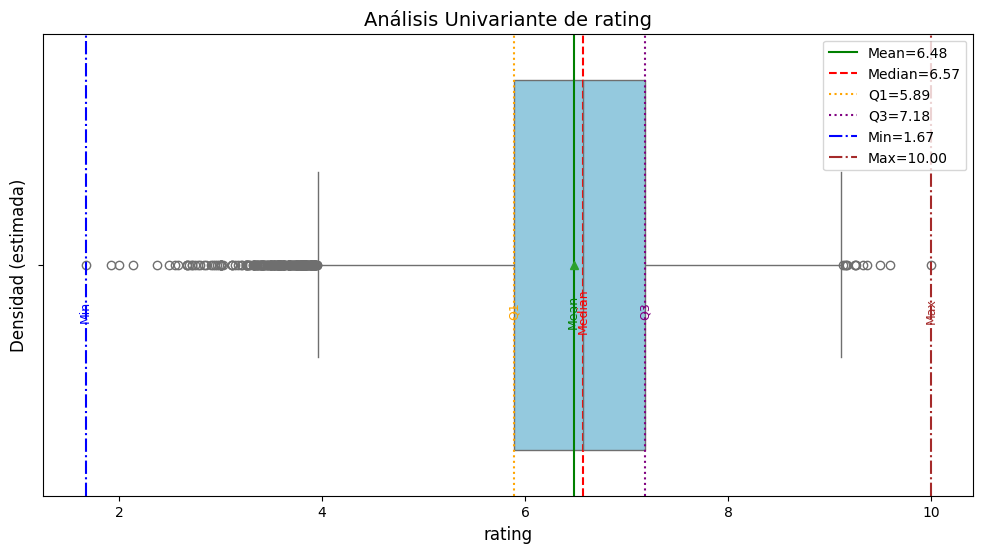

In [52]:
eda.analisis_univariante(df_1,'rating')

Interpretación:

La distribución de rating parece estar centrada en valores moderados, con pocas calificaciones extremadamente bajas o extremadamente altas. Esto puede indicar que la mayoría de los elementos son "aceptables" a "buenos", y las calificaciones extremas son menos comunes.

In [53]:
# Veamos quienes son esos datos atipicos.

Q1 = df_1['rating'].quantile(0.25)
Q3 = df_1['rating'].quantile(0.75)
IQR = Q3 - Q1

# Definiendo límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificación de outliers
outliers = df_1[(df_1['rating'] < lower_bound) | (df_1['rating'] > upper_bound)]

# Mostrando los outliers detectados
print(outliers)

       anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                          GintamaÂ°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12238     17825                Ikenai Boy: Ikasu Maruhi Hand Power   
12243     23677                               Manga Edo Erobanashi   
12245     29994                          Misato-chan no Yume Nikki   
12250     29111  Onna Spy Goumon: Teki no Ajito wa Jotai Goumonsho   
12253     17833                                    Pink no Curtain   

                                                   genre   type  episodes  \
0                   Drama, Romance, School, Supernatural  Movie       1.0   
1    

In [54]:
eda.analisis_univariante(df_1,'members')

Interpretación:

La distribución está altamente sesgada hacia la derecha debido a la presencia de un número pequeño de elementos con muchísimos miembros. La mayoría de los datos tienen un número de miembros relativamente bajo (por debajo de 1,549), pero los outliers extremos influyen en la media.

In [55]:
# Veamos quienes son esos datos atipicos.

Q1 = df_1['members'].quantile(0.25)
Q3 = df_1['members'].quantile(0.75)
IQR = Q3 - Q1

# Definiendo límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificación de outliers
outliers = df_1[(df_1['members'] < lower_bound) | (df_1['members'] > upper_bound)]

# Mostrando los outliers detectados
print(outliers)

       anime_id                              name  \
0         32281                    Kimi no Na wa.   
1          5114  Fullmetal Alchemist: Brotherhood   
2         28977                         GintamaÂ°   
3          9253                       Steins;Gate   
4          9969                     Gintama&#039;   
...         ...                               ...   
11507       746          Papa to Kiss in the Dark   
11543      8577            Aki-Sora: Yume no Naka   
12186      5391                     Pico to Chico   
12190      4866               Pico x CoCo x Chico   
12194      1639                      Boku no Pico   

                                                   genre   type  episodes  \
0                   Drama, Romance, School, Supernatural  Movie       1.0   
1      Action, Adventure, Drama, Fantasy, Magic, Mili...     TV      64.0   
2      Action, Comedy, Historical, Parody, Samurai, S...     TV      51.0   
3                                       Sci-Fi, Thrille

In [56]:
df_1.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members',
       'members_cuartil'],
      dtype='object')

- Vamos a crear una clase para generar los histogramas.

In [57]:
class Eda2:
    def __init__(self):
        pass

    def generar_histogramas(self, df, bins=20):
        """
        Genera histogramas para todas las columnas numéricas de un DataFrame.
        
        :param df: DataFrame con los datos.
        :param bins: Número de bins para los histogramas.
        """
        columnas_numericas = df.select_dtypes(include=['number']).columns
        
        # Crear histogramas para cada columna
        for column in columnas_numericas:
            plt.figure(figsize=(10, 6))
            sns.histplot(df[column], bins=bins, kde=True, color='skyblue')
            
            # Agregar detalles al gráfico
            plt.title(f'Histograma de {column}', fontsize=14)
            plt.xlabel(column, fontsize=12)
            plt.ylabel('Frecuencia', fontsize=12)
            plt.grid(axis='y', linestyle='--', alpha=0.7)
            plt.show()

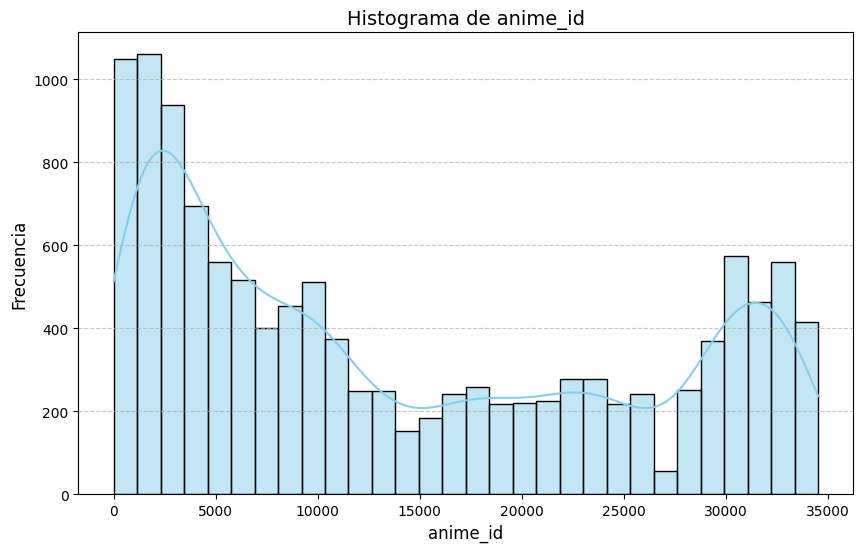

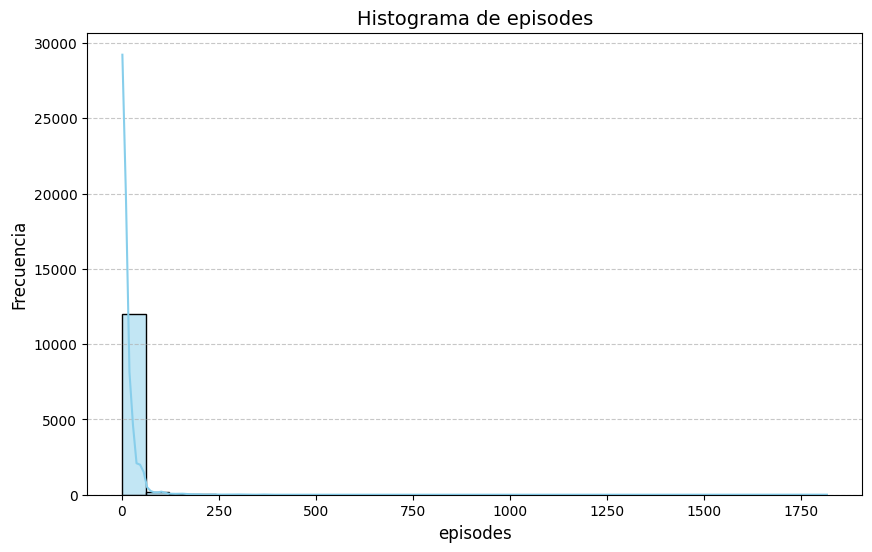

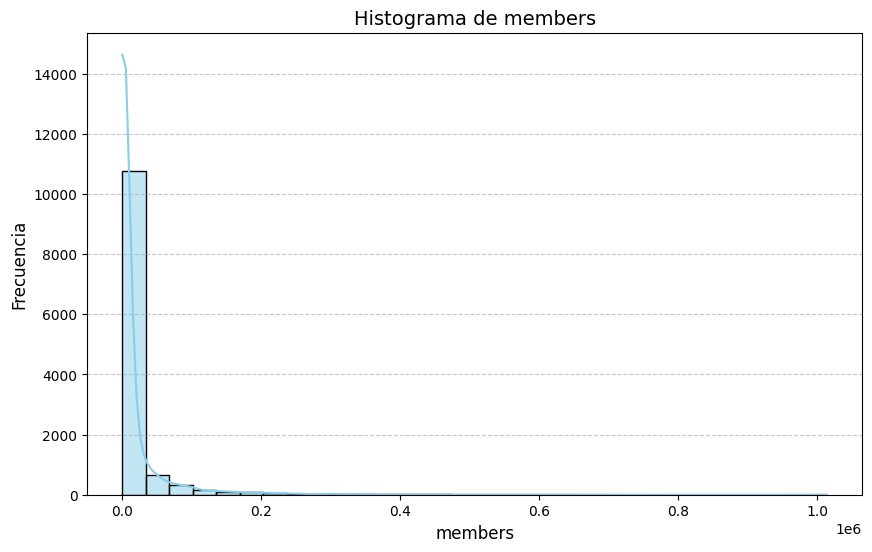

In [58]:
eda2 = Eda2()
eda2.generar_histogramas(df_1, bins=30)

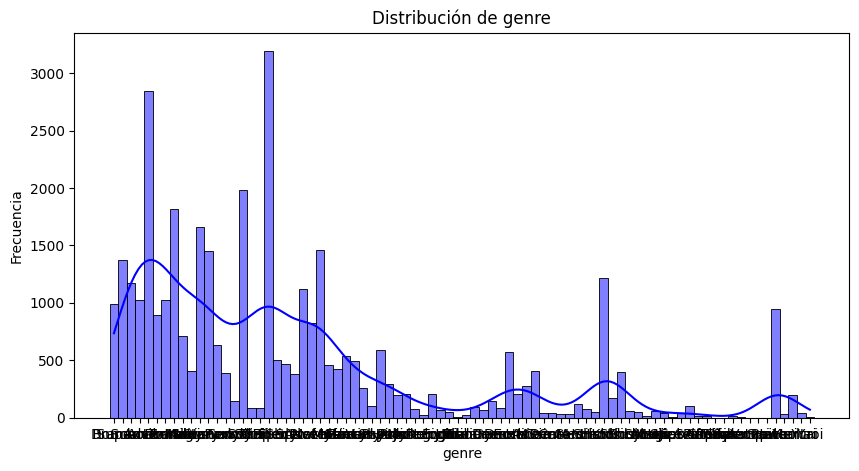

In [59]:
plt.figure(figsize=(10, 5))
sns.histplot(df_1_copia['genre'], kde=True, bins=30, color='blue')
plt.title('Distribución de genre')
plt.xlabel('genre')
plt.ylabel('Frecuencia')
plt.show()

**Observaciones**

- Episodios: Se observa que la mayoría de los episodios corresponden a números pequeños, mientras que los grupos con una gran cantidad de episodios son pocos.

- Rating: La distribución de rating se asemeja a una distribución normal, con una cola más larga a la derecha, lo que indica que hay menos anime con un rating extremo.

- Membresía: La distribución de membresía se asemeja a una distribución exponencial, con una cola más larga a la derecha, lo que indica que hay menos anime con una gran cantidad de miembros.

- Género: La distribución de géneros muestra que la mayoría de los animes pertenecen a los géneros de Comedy, acción, aventura, Fantasy , Drama y Shounen (BL).



In [60]:
# sns.set(style="whitegrid")

# fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# sns.histplot(df_1_copia['genre'], bins=30, ax=axes[0, 0], kde=True)
# axes[0, 0].set_title('Distribución de los generos')

# sns.histplot(df_1['type'], bins=30, ax=axes[0, 1], kde=True)
# axes[0, 1].set_title('Distribución del Tipo de anime')


# sns.histplot(df_1['episodes'], bins=30, ax=axes[0, 2], kde=True)
# axes[0, 2].set_title('Distribución de los ebisodios)')


# sns.histplot(df_1['rating'], bins=30, ax=axes[1, 0], kde=True)
# axes[1, 0].set_title('Distribución del rating')


# sns.histplot(df_1['members'], bins=30, ax=axes[1, 1], kde=True)
# axes[1, 1].set_title('Distribución de membresia')

# plt.tight_layout()
# plt.show()

Calcular la Asimetría y Curtosis:

Estas métricas ayudan a entender si la distribución es simétrica, sesgada o tiene colas más largas o más cortas que una distribución normal.

In [61]:
skewness = df_1['episodes'].skew()  # Asimetría
kurtosis = df_1['episodes'].kurt()  # Curtosis
print(f'Asimetría de episodes: {skewness}')
print(f'Curtosis de episodes: {kurtosis}')

Asimetría de episodes: 23.63123534529237
Curtosis de episodes: 750.1699315958248


Asimetría (skewness) es:

Positiva: La distribución está sesgada a la derecha (cola larga a la derecha).

Curtosis (kurtosis) es: Mayor a 3: Tiene colas más pesadas que la normal (leptocúrtica).

El histograma confirmará el sesgo.


In [62]:
skewness = df_1['rating'].skew()  # Asimetría
kurtosis = df_1['rating'].kurt()  # Curtosis
print(f'Asimetría de rating: {skewness}')
print(f'Curtosis de ranting: {kurtosis}')

Asimetría de rating: -0.5518600228580576
Curtosis de ranting: 0.534651157282394


Asimetría (skewness) es: Cerca de 0: La distribución es simétrica.

Curtosis (kurtosis) es: Menor a 3: Tiene colas más ligeras que la normal (platicúrtica)

In [63]:
skewness = df_1['members'].skew()  # Asimetría
kurtosis = df_1['members'].kurt()  # Curtosis
print(f'Asimetría de members: {skewness}')
print(f'Curtosis de members: {kurtosis}')

Asimetría de members: 6.676911038407477
Curtosis de members: 62.73766111754879


Asimetría (skewness) es:

Positiva: La distribución está sesgada a la derecha (cola larga a la derecha).

Curtosis (kurtosis) es: Mayor a 3: Tiene colas más pesadas que la normal (leptocúrtica).

**Prueda de Normalidad**

In [64]:
from scipy.stats import shapiro

stat, p = shapiro(df_1['rating'])
print(f'Estadístico de Shapiro: {stat}, p-valor: {p}')
if p > 0.05:
    print("Los datos parecen seguir una distribución normal.")
else:
    print("Los datos NO siguen una distribución normal.")

Estadístico de Shapiro: 0.9828414123364281, p-valor: 7.6072704851934e-36
Los datos NO siguen una distribución normal.


c:\Users\denis\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12269.
  res = hypotest_fun_out(*samples, **kwds)


In [73]:
from scipy.stats import shapiro

stat, p = shapiro(df_1['members'])
print(f'Estadístico de Shapiro: {stat}, p-valor: {p}')
if p > 0.05:
    print("Los datos parecen seguir una distribución normal.")
else:
    print("Los datos NO siguen una distribución normal.")

Estadístico de Shapiro: 0.3460722824025746, p-valor: 6.808272102867107e-110
Los datos NO siguen una distribución normal.


c:\Users\denis\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 12269.
  res = hypotest_fun_out(*samples, **kwds)


In [66]:
from scipy.stats import shapiro

stat, p = shapiro(df_1_copia['episodes'])
print(f'Estadístico de Shapiro: {stat}, p-valor: {p}')
if p > 0.05:
    print("Los datos parecen seguir una distribución normal.")
else:
    print("Los datos NO siguen una distribución normal.")

Estadístico de Shapiro: nan, p-valor: nan
Los datos NO siguen una distribución normal.


A pesar de que los histogramas y las pruebas de Shapiro confirman que no todos los datos siguen una distribución normal, la distribución de los ratings parece ser bastante aproximadamente normal. Esto puede ayudar a interpretar los resultados de las estadísticas más claramente.

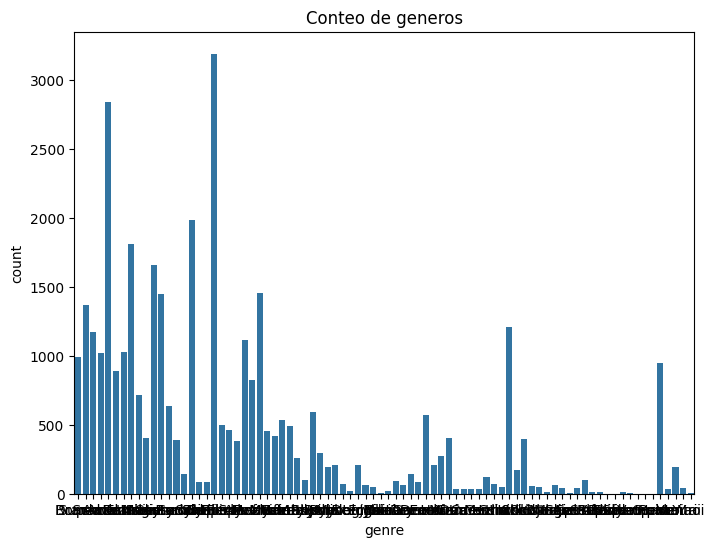

Conteo de valores:
genre
Comedy         3193
Action         2845
 Sci-Fi        1986
 Fantasy       1815
 Shounen       1663
               ... 
Thriller          1
Police            1
Space             1
Super Power       1
Vampire           1
Name: count, Length: 82, dtype: int64
Porcentaje de valores:
genre
Comedy         8.799780
Action         7.840706
 Sci-Fi        5.473336
 Fantasy       5.002067
 Shounen       4.583161
                 ...   
Thriller       0.002756
Police         0.002756
Space          0.002756
Super Power    0.002756
Vampire        0.002756
Name: proportion, Length: 82, dtype: float64


In [67]:
conteo = df_1_copia['genre'].value_counts()
porcentaje = df_1_copia['genre'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6)) 
sns.countplot(x='genre', data=df_1_copia) 
plt.title('Conteo de generos') 
plt.show() 

print("Conteo de valores:")
print(conteo)
print("Porcentaje de valores:")
print(porcentaje)

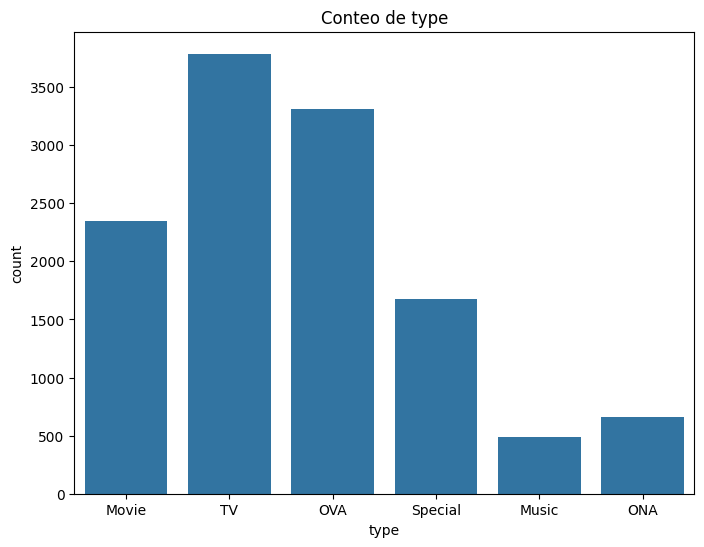

Conteo de valores:
type
TV         3787
OVA        3311
Movie      2348
Special    1676
ONA         659
Music       488
Name: count, dtype: int64
Porcentaje de valores:
type
TV         30.866411
OVA        26.986714
Movie      19.137664
Special    13.660445
ONA         5.371261
Music       3.977504
Name: proportion, dtype: float64


In [68]:
conteo = df_1['type'].value_counts()
porcentaje = df_1['type'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6)) 
sns.countplot(x='type', data=df_1) 
plt.title('Conteo de type') 
plt.show() 

print("Conteo de valores:")
print(conteo)
print("Porcentaje de valores:")
print(porcentaje)

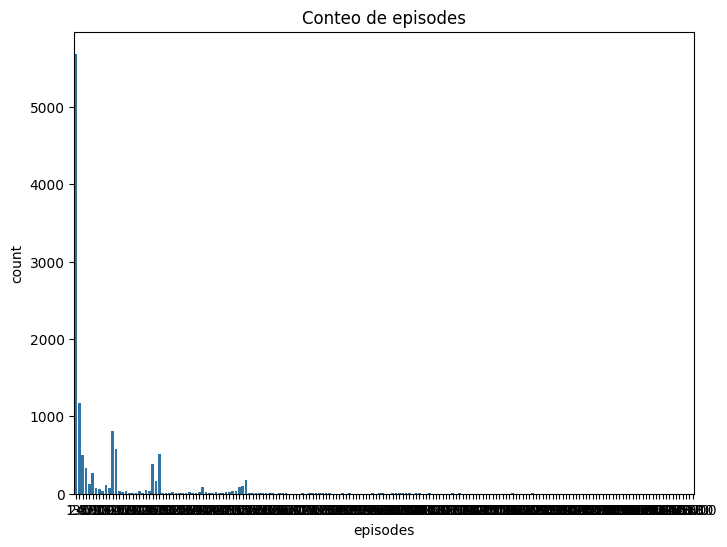

Conteo de valores:
episodes
1.0       5687
2.0       1172
12.0       816
13.0       572
26.0       514
          ... 
1006.0       1
162.0        1
132.0        1
141.0        1
125.0        1
Name: count, Length: 186, dtype: int64
Porcentaje de valores:
episodes
1.0       46.352596
2.0        9.552531
12.0       6.650909
13.0       4.662157
26.0       4.189420
            ...    
1006.0     0.008151
162.0      0.008151
132.0      0.008151
141.0      0.008151
125.0      0.008151
Name: proportion, Length: 186, dtype: float64


In [69]:
conteo = df_1['episodes'].value_counts()
porcentaje = df_1['episodes'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6)) 
sns.countplot(x='episodes', data=df_1) 
plt.title('Conteo de episodes') 
plt.show() 

print("Conteo de valores:")
print(conteo)
print("Porcentaje de valores:")
print(porcentaje)

In [70]:
df_1_copia.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [71]:
conteo = df_1['members'].value_counts()
porcentaje = df_1['members'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6)) 
sns.countplot(x='members', data=df_1) 
plt.title('Conteo de members') 
plt.show() 

print("Conteo de valores:")
print(conteo)
print("Porcentaje de valores:")
print(porcentaje)

Conteo de valores:
members
60      36
72      36
74      33
62      32
56      31
        ..
491      1
2943     1
3072     1
4981     1
1310     1
Name: count, Length: 6696, dtype: int64
Porcentaje de valores:
members
60      0.293422
72      0.293422
74      0.268971
62      0.260820
56      0.252669
          ...   
491     0.008151
2943    0.008151
3072    0.008151
4981    0.008151
1310    0.008151
Name: proportion, Length: 6696, dtype: float64


**Observación del conteo**

